# Construction of Building Typologies from a Regional Material Catalog:
## Assessment of Urban Heat Demand and the Environmental Impact of Retrofit Policies.

# (e) Embodied Energy

**Supplementary material to the paper with the same title**

[M. Esteban Munoz H.](emunozh@gmail.com)

Fri Aug 07, 2015

In [1]:
import pandas as pd
import matplotlib.pylab as plt
import matplotlib
pd.options.display.mpl_style = 'default'
%matplotlib inline

In [2]:
from scripts.HeatDemand import computeEmbodiedEnergy

In [2]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 14}
matplotlib.rc('font', **font)

In [ ]:
computeEmbodiedEnergy()

In [3]:
buildings = pd.read_csv("buildings_genergy.csv")

In [4]:
buildings_sel = buildings[["Steinwolle_12cm", "Steinwolle_24cm", "XPS_12cm", "XPS_24cm", "EPS_12cm", "EPS_24cm"]]

In [5]:
buildings_sel.head()

,Steinwolle_12cm,Steinwolle_24cm,XPS_12cm,XPS_24cm,EPS_12cm,EPS_24cm
0,27952.550576,55905.101152,215433.828170,430867.656340,21534.529003,43069.058006
1,60533.347722,121066.695443,466538.135624,933076.271248,46634.639963,93269.279926
2,89276.767080,178553.534160,688067.289117,1376134.578235,68778.450995,137556.901991
3,208750.883053,417501.766106,1608869.349789,3217738.699577,160820.814305,321641.628609
4,39587.369535,79174.739070,305104.843401,610209.686803,30497.945262,60995.890525


In [6]:
buildings_sel = buildings_sel.div(buildings.sqm, axis=0)
buildings_sel = buildings_sel.div(1/3.6, axis=0)
buildings_sel = buildings_sel.div(40, axis=0)

In [7]:
buildings_sel.head()

,Steinwolle_12cm,Steinwolle_24cm,XPS_12cm,XPS_24cm,EPS_12cm,EPS_24cm
0,12.958829,25.917658,99.875328,199.750655,9.983428,19.966856
1,8.730456,17.460912,67.286723,134.573446,6.725907,13.451814
2,8.125710,16.251420,62.625869,125.251738,6.260013,12.520026
3,29.099860,58.199721,224.276290,448.552580,22.418412,44.836824
4,10.794059,21.588118,83.191173,166.382345,8.315698,16.631397


/usr/lib/python3.4/site-packages/matplotlib/font_manager.py:1282: UserWarning: findfont: Font family ['normal'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


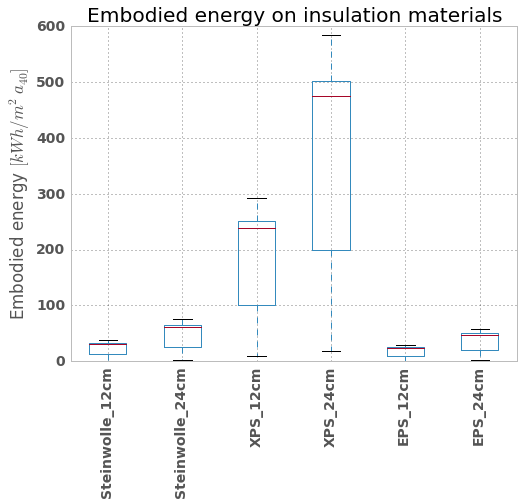

In [9]:
fig, ax = plt.subplots(figsize=(8, 6))
bp = buildings_sel.boxplot(ax=ax, return_type='axes')
locs, labels = plt.xticks()
labels = bp.get_xticklabels()
labels_ticks = [l.get_text().split("\\\\\\")[0] for l in labels]
ax.set_xticklabels(labels_ticks, rotation=90)
ax.set_title("Embodied energy on insulation materials")
ax.set_ylabel(r"Embodied energy $[kWh/m^2 a_{40}]$")
ax.set_xlabel("")
fig.savefig("FIGURES/genergy.png", bbox_inches="tight")

# Materials

In [1]:
from OEKOBAU import getData_oeko
from MASEA import getData_masea

In [2]:
oeko = getData_oeko()
OEKO = oeko[([((("WDVS" in o_name) & ("Steinwolle" in o_name)) |
               (("WDVS" in o_name) & ("EPS" in o_name) &
               ("Daemmplatte" in o_name)) &
               ("End of life" not in o_name) | ("XPS" in o_name))
        for o_name in oeko.name])]

masea = getData_masea()
MASEA = masea[(masea.name == "Steinwolle_60") |
              (masea.name == "EPS_040.15") |
              (masea.name == "XPS_Deckschicht 3")]

In [3]:
OEKO

,name,TEI,TEIunit,unit,RFA
480,XPS-Daemmstof,97.5726,MJ,kg,1
482,WDVS mit EPS Daemmplatte geklebt - Fachverban...,390.1300,MJ,m2,1
610,WDVS [kg m²] (geklebt und geduebelt Steinwolle...,506.4020,MJ,m2,1


In [4]:
MASEA

,name,family,subfamily,DenV,ConducV,HeatV,DiffV
69,Steinwolle_60,Dämmstoffe,n.a,60,0.05,840,1.2
82,XPS_Deckschicht 3,Dämmstoffe,n.a,40,0.03,1500,450.0
165,EPS_040.15,Dämmstoffe,n.a,15,0.04,1500,30.0
